In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns

In [13]:
df = pd.read_csv('../dati/serie-storiche-ecommerce.csv', quotechar = "'", parse_dates = ['data'], decimal = ',')

In [14]:
df = df.assign(year = df.data.dt.year,
               month = df.data.dt.month,
               day = df.data.dt.day,
               DayOfWeek = df.data.dt.dayofweek)

In [15]:
df[df.totale < 0] # c'è un valore negativo 

,data,totale,settore,year,month,day,DayOfWeek
20097,2020-07-31,-2159.18,Casual,2020,7,31,4


# revenue by year

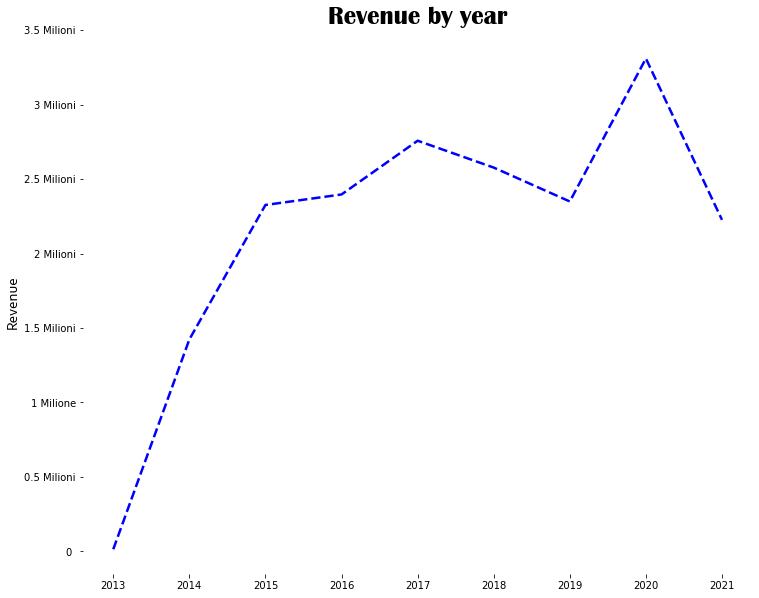

In [16]:
total_revenue_by_year = data = df.groupby('year')['totale'].sum().reset_index()
fig, ax = plt.subplots(1,1, figsize = (12,10)) 
ax.plot(total_revenue_by_year[total_revenue_by_year['year'] <= 2021].year, total_revenue_by_year[total_revenue_by_year['year'] <= 2021].totale, linestyle = 'dashed' , linewidth = 2.5, color = 'blue')
ax.set_ylabel('Revenue', fontsize = 15, fontname = 'Corbel')
ax.set_title('Revenue by year', fontsize = 25, fontname = 'Britannic Bold');
ax.set_yticks([0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000, 35000000])
ax.set_yticklabels(["0 ", "0.5 Milioni", "1 Milione", "1.5 Milioni", "2 Milioni", "2.5 Milioni", "3 Milioni", "3.5 Milioni"])
plt.box(False)

In [17]:
facet = sns.FacetGrid(data = df,  col = 'settore',  col_wrap = 6, sharey = False, height = 3, aspect= 2)
facet.map(sns.lineplot, 'data', 'totale');
facet.fig.subplots_adjust(top=0.9)
facet.fig.suptitle('Revenue by sector', fontsize = 30)

In [ ]:
revenue_by_year_and_sector_in_percentage = (df.groupby(['year','settore'])['totale'].sum()/df.groupby(['year'])['totale'].sum() * 100).reset_index()

Text(0.5, 1.0, 'revenue percentage by sector')

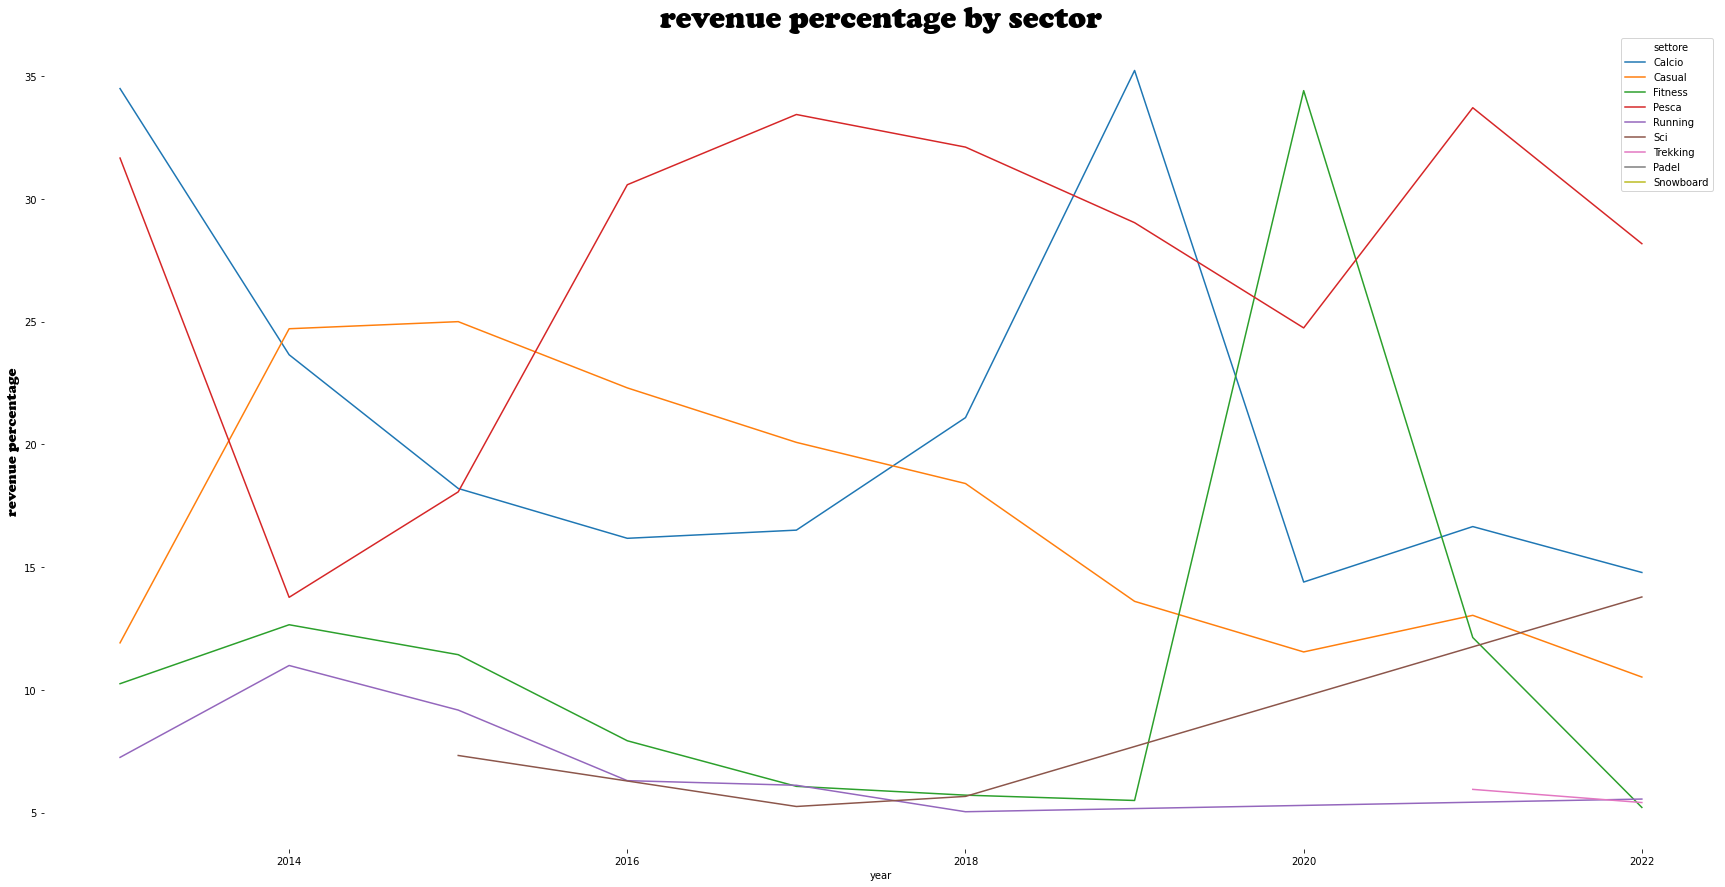

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (30,15))
sns.lineplot(data = revenue_by_year_and_sector_in_percentage[revenue_by_year_and_sector_in_percentage.totale > 5], x = 'year', y = 'totale', hue = 'settore',  ax = ax)
plt.legend(loc = 'upper right')
plt.box(False)
ax.set_ylabel('revenue percentage', fontsize = 15, fontname = 'Cooper Black')
ax.set_title('revenue percentage by sector', fontsize = 30, fontname = 'Cooper Black')